In [37]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt


In [38]:
df_fit = pd.read_csv("../FITNESS.csv", encoding = "CP949")

In [39]:
df_fit.head(5)

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,F,42,40,68.15,59.571,8.17,166,40,172
1,Gracie,,38,30,81.87,60.055,8.63,170,48,186
2,Luanne,F,43,40,85.84,54.297,8.65,156,45,168
3,Mimi,F,50,50,70.87,54.625,8.92,146,48,155
4,Chris,M,49,40,70.00,49.156,8.95,180,44,185


In [40]:
df_fit = df_fit.replace(" ","F")

In [42]:
df_fit.head(5)

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,F,42,40,68.15,59.571,8.17,166,40,172
1,Gracie,F,38,30,81.87,60.055,8.63,170,48,186
2,Luanne,F,43,40,85.84,54.297,8.65,156,45,168
3,Mimi,F,50,50,70.87,54.625,8.92,146,48,155
4,Chris,M,49,40,70.00,49.156,8.95,180,44,185


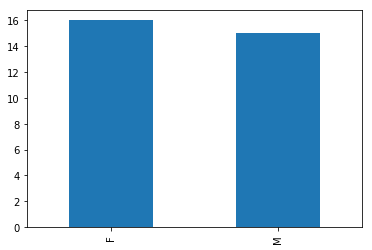

In [48]:
df_count = df_fit["GENDER"].value_counts()
df_count.plot.bar()

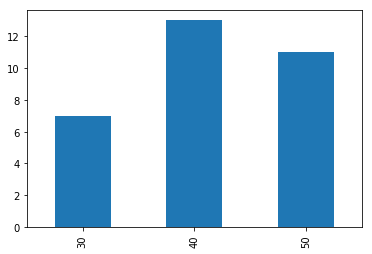

In [51]:
df_count = df_fit["AGEGROUP"].value_counts()
df_count.sort_index(inplace=True);
df_count.plot.bar()

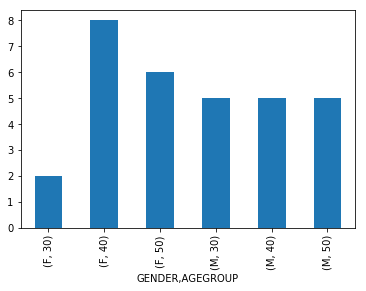

In [52]:
df_groupby_total = df_fit.groupby(["GENDER", "AGEGROUP"], as_index=False).size()
df_groupby_total.plot.bar()

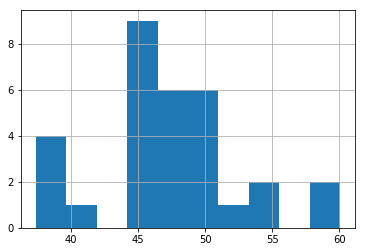

In [53]:
df_fit["OXY"].hist()

In [60]:
list(df_fit)

['NAME',
 'GENDER',
 'AGE',
 'AGEGROUP',
 'WEIGHT',
 'OXY',
 'RUNTIME',
 'RUNPULSE',
 'RSTPULSE',
 'MAXPULSE']

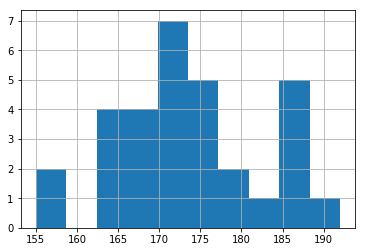

In [61]:
df_fit["MAXPULSE"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effcee0a358>,
      dtype=object)

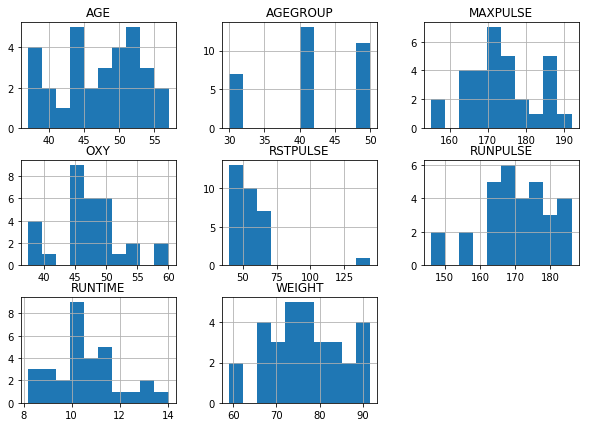

In [81]:
df_fit.hist(figsize=(10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7effcec00198>,
      dtype=object)

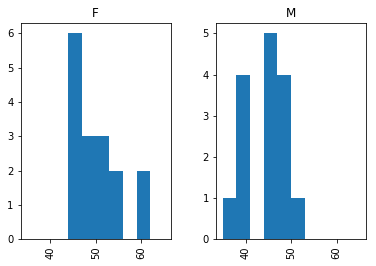

In [82]:
df_fit.hist(column="OXY",by = "GENDER", range = (35, 65))

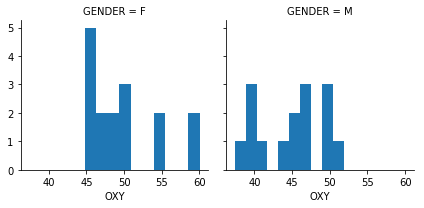

In [85]:
grid = sns.FacetGrid(df_fit, col = "GENDER")
grid.map(plt.hist, "OXY")

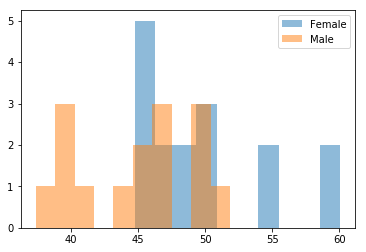

In [90]:
plt.hist(df_fit[df_fit["GENDER"]=="F"]["OXY"],label = "Female", alpha = 0.5)
plt.hist(df_fit[df_fit["GENDER"]=="M"]["OXY"],label = "Male", alpha = 0.5)
plt.legend()

# alpha = transparency

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

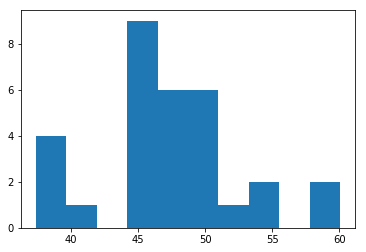

In [91]:
plt.hist(x = "OXY", data = df_fit)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

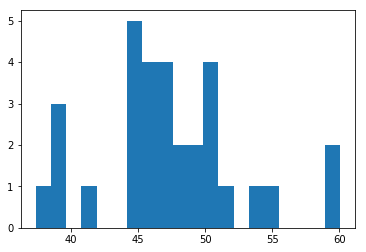

In [93]:
plt.hist(x = "OXY", data = df_fit, bins = 20)

# bins : range of x

### Detect Outlier using BoxPlot

In [95]:
# Outlier
# Outlier = Below (Q1-1.5*IQR) or over (Q3-1.5*IQR)
# IQR = Q3 - Q1

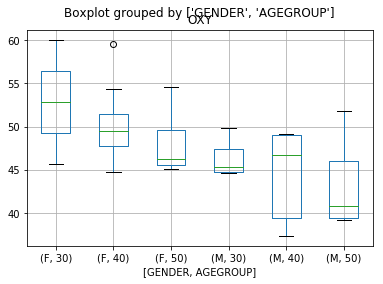

In [98]:
df_fit.boxplot(column="OXY", by = ["GENDER", "AGEGROUP"])

### Pie chart

In [100]:
df_count = df_fit.groupby(["GENDER"]).size()

#GroupBy.size() : Compute group sizes

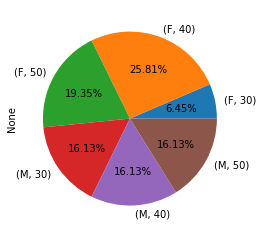

In [170]:
df_count.plot.pie(autopct = "%.2f%%")

#none?

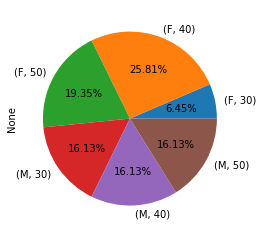

In [114]:
df_count = df_fit.groupby(["GENDER", "AGEGROUP"]).size()
df_count.plot.pie(autopct = "%.2f%%")

### Scatter Plot

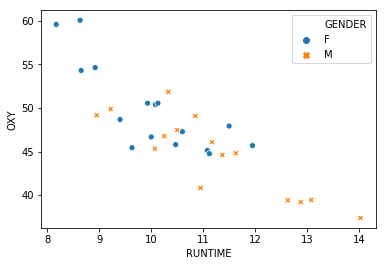

In [118]:
sns.scatterplot(x="RUNTIME", y="OXY", hue = "GENDER", style = "GENDER", data = df_fit)

# Hue : Color
# Sytle : shape of dots

### Scatter Matrix

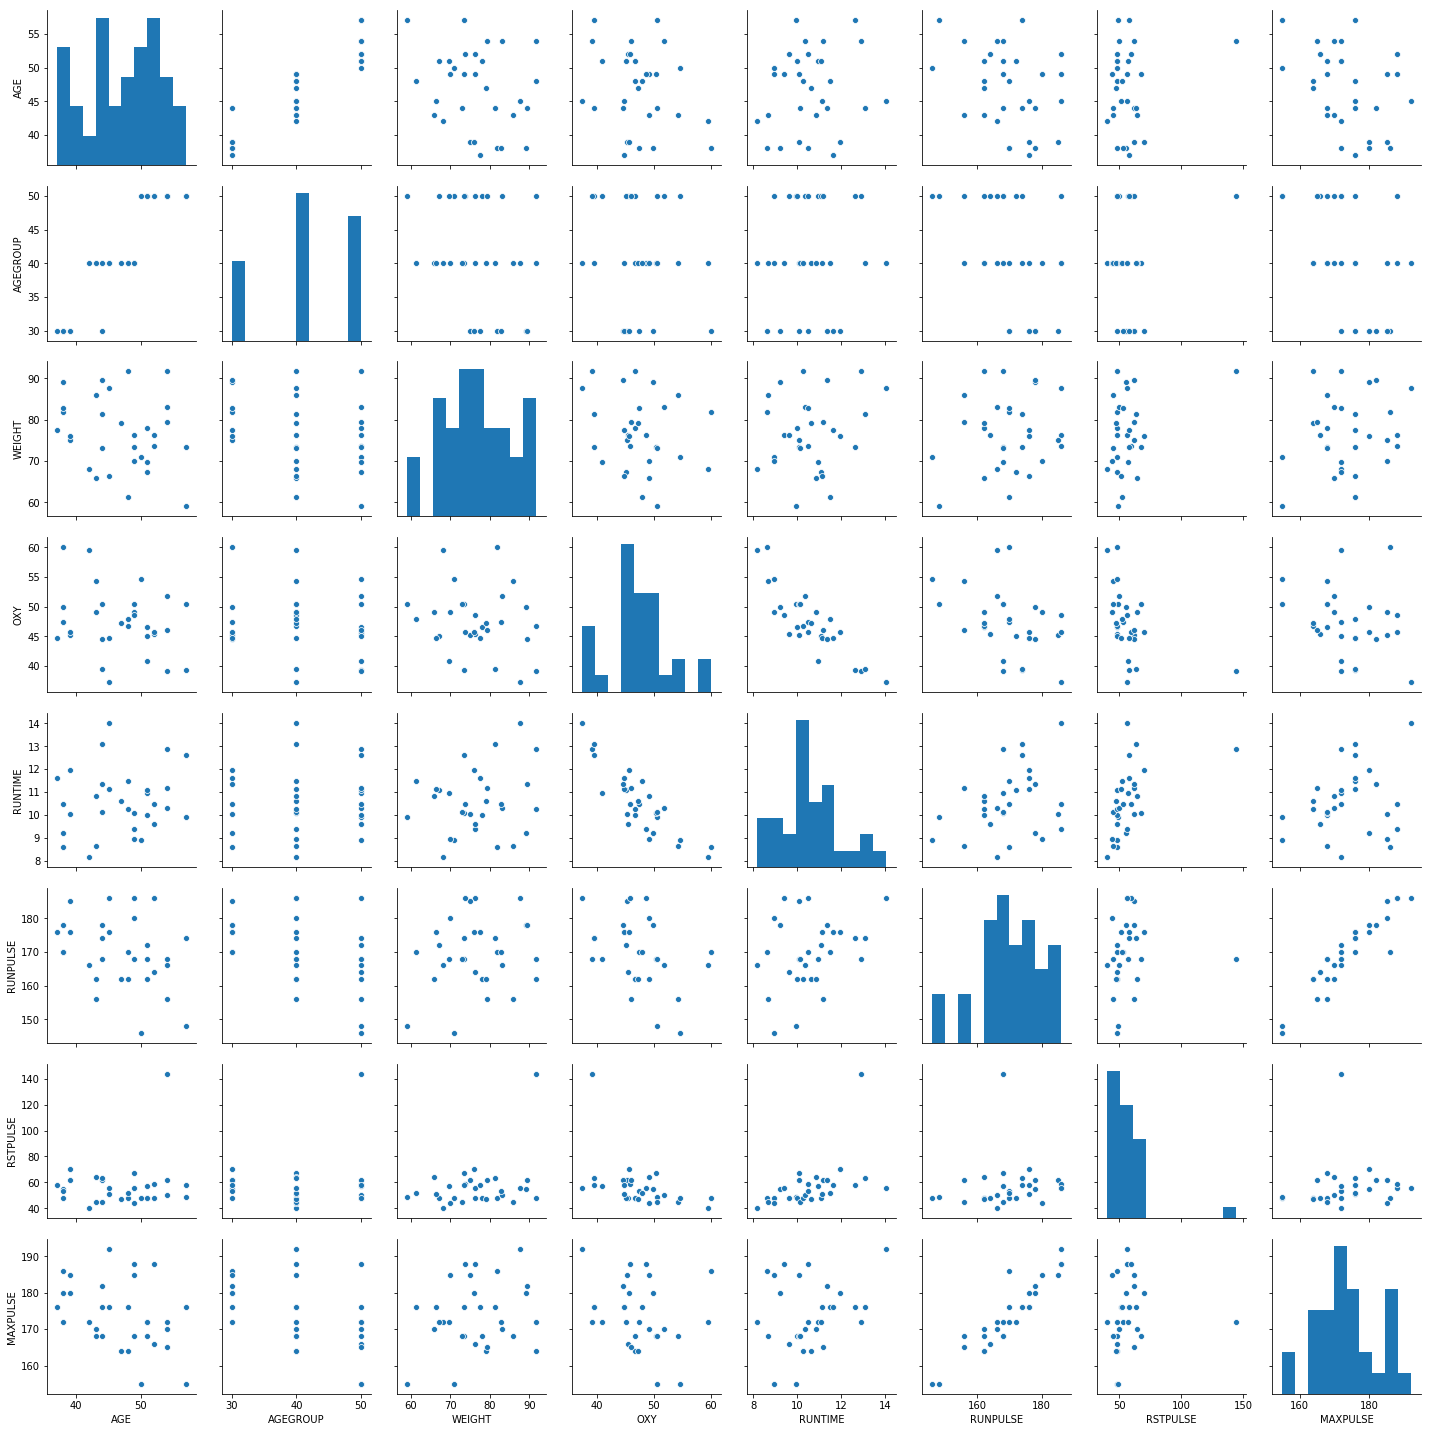

In [120]:
sns.pairplot(df_fit)

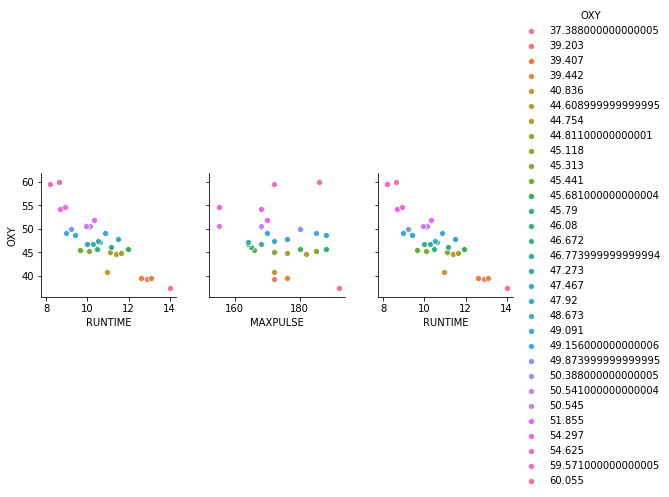

In [123]:
sns.pairplot(df_fit, y_vars=["OXY"], x_vars=["RUNTIME", "MAXPULSE", "RUNTIME"], hue = "OXY")

### Trend chart - Time series analysis

In [180]:
df_currency = pd.read_csv("환율.csv", parse_dates=["APPL_DATE"])

In [181]:
df_currency_pivot = df_currency.pivot(index = "APPL_DATE", columns = "CURRENCY", values = "STD_RATE")
df_currency_pivot.head(5)

# APPL_DATE?

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


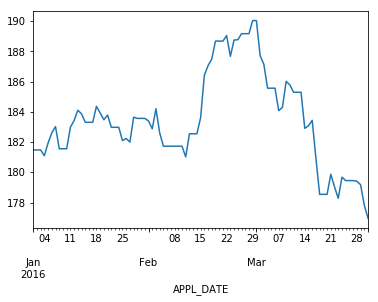

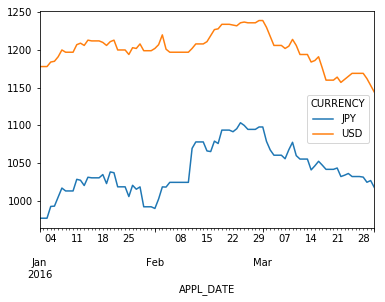

In [182]:
df_currency_pivot["CNY"].plot()
df_currency_pivot[["JPY", "USD"]].plot()

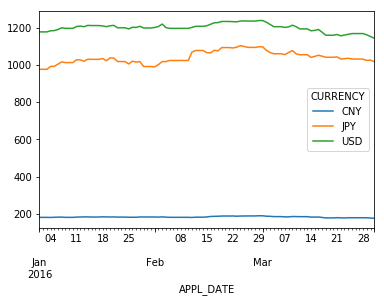

In [183]:
df_currency_pivot[["CNY","JPY", "USD"]].plot()
# scailing 필요
# APPL DATE TYPE TRANSFORM

In [184]:
df_currency.head(5)

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [185]:
df_currency_pivot_USD = df_currency.pivot(index = "APPL_DATE", columns = "CURRENCY", values = "USD_CONV_DATE")

In [186]:
df_currency_pivot_USD.head(5)

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,0.1541,0.8294,1.0
2016-01-02,0.1541,0.8294,1.0
2016-01-03,0.1541,0.8294,1.0
2016-01-04,0.1540,0.8384,1.0
2016-01-05,0.1530,0.8380,1.0


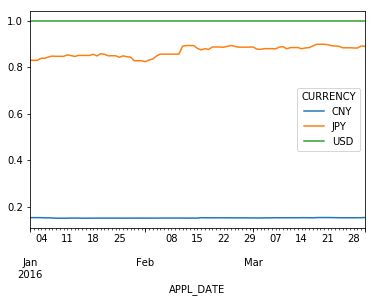

In [187]:
df_currency_pivot_USD[["CNY", "JPY", "USD"]].plot()
# APPL-DATE ??

In [188]:
df_currency["CURRENCY"].value_counts()

# pandas.Series.value_counts

CNY    91
JPY    91
USD    91
Name: CURRENCY, dtype: int64

In [189]:
from sklearn.preprocessing import minmax_scale

In [190]:
df_currency_pivot_minmax = minmax_scale(df_currency_pivot)

In [191]:
df_currency_pivot_minmax = pd.DataFrame(df_currency_pivot_minmax, columns =["CNY", "JPY", "USD"])

In [192]:
df_currency_pivot_minmax.head()

,CNY,JPY,USD
0,0.345302,0.000000,0.357895
1,0.345302,0.000000,0.357895
2,0.345302,0.000000,0.357895
3,0.316272,0.123528,0.421053
4,0.380443,0.126531,0.431579


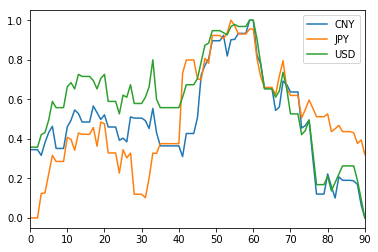

In [193]:
df_currency_pivot_minmax[["CNY", "JPY", "USD"]].plot()

### Heatmap

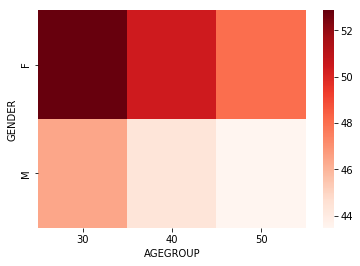

In [194]:
df_agg = df_fit.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
sns.heatmap(df_pivot, cmap = "Reds")

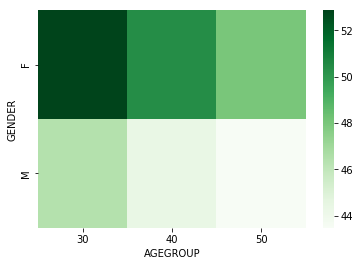

In [195]:
df_agg = df_fit.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
sns.heatmap(df_pivot, cmap = "Greens")

### Countour plot

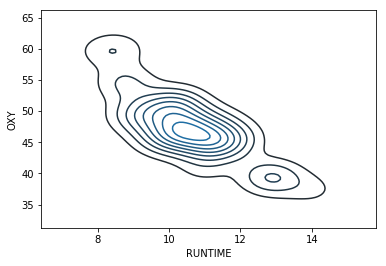

In [199]:
sns.kdeplot(df_fit["RUNTIME"], df_fit["OXY"], shade = False)

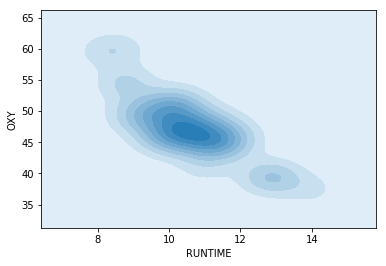

In [201]:
sns.kdeplot(df_fit["RUNTIME"], df_fit["OXY"], shade = True)

### Parallel Plot

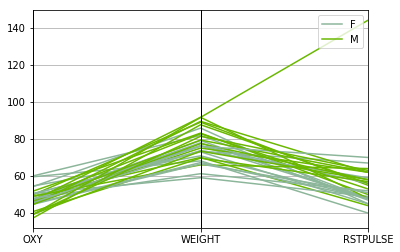

In [202]:
pd.plotting.parallel_coordinates(df_fit, "GENDER", cols = ["OXY", 'WEIGHT', 'RSTPULSE'])

### Customizing

Text(485.7977272727271, 0.5, 'Oxygen level')

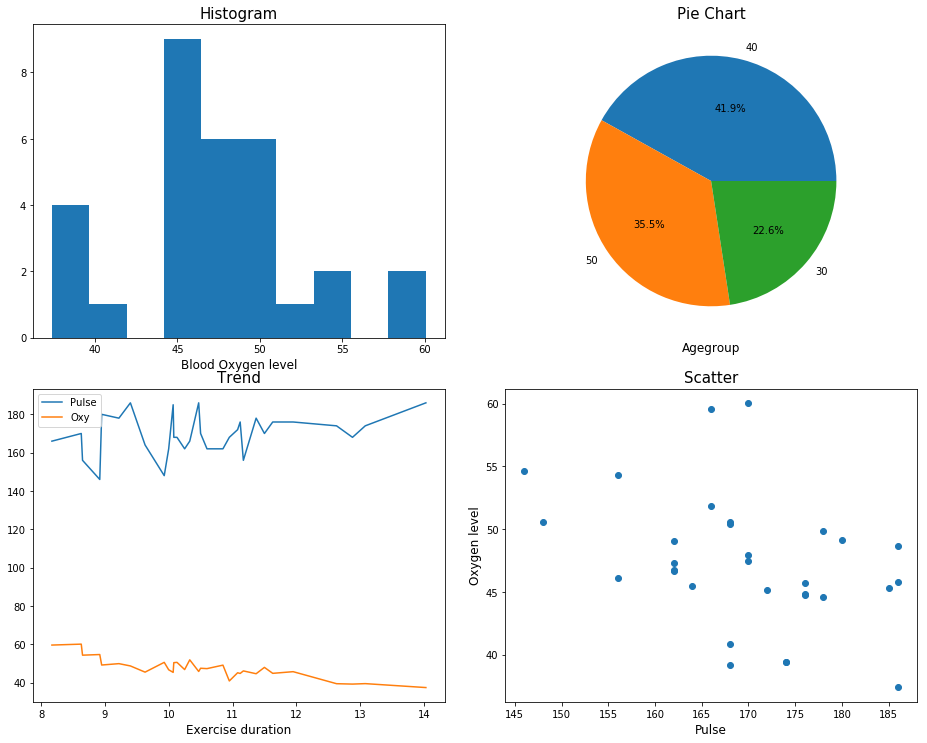

In [224]:
df_count = df_fit["AGEGROUP"].value_counts()
fig, axes = plt.subplots(nrows =2, ncols=2, figsize = (13, 10))
plt.tight_layout(w_pad=3, h_pad=3)
# pad = padding

axes[0,0].hist(df_fit["OXY"])
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("Blood Oxygen level", fontsize=12)

axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct = "%.1f%%")
axes[0,1].set_title("Pie Chart", fontsize = 15)
axes[0,1].set_xlabel("Agegroup", fontsize = 12)

axes[1,0].plot("RUNTIME","RUNPULSE", data=df_fit, label="Pulse")
# axes[1.0].plot("RUNTIME","OXY", data = df_fit, label="Blood Oxygen Level")
axes[1,0].plot("RUNTIME", "OXY", data=df_fit, label="Oxy")
axes[1,0].set_title("Trend", fontsize = 15)
axes[1,0].set_xlabel("Exercise duration", fontsize = 12)
axes[1,0].legend()

axes[1,1].scatter("RUNPULSE","OXY", data = df_fit)
axes[1,1].set_title("Scatter", fontsize = 15)
axes[1,1].set_xlabel("Pulse", fontsize = 12)
axes[1,1].set_ylabel("Oxygen level", fontsize =12)

Text(485.7977272727271, 0.5, 'Oxygen level')

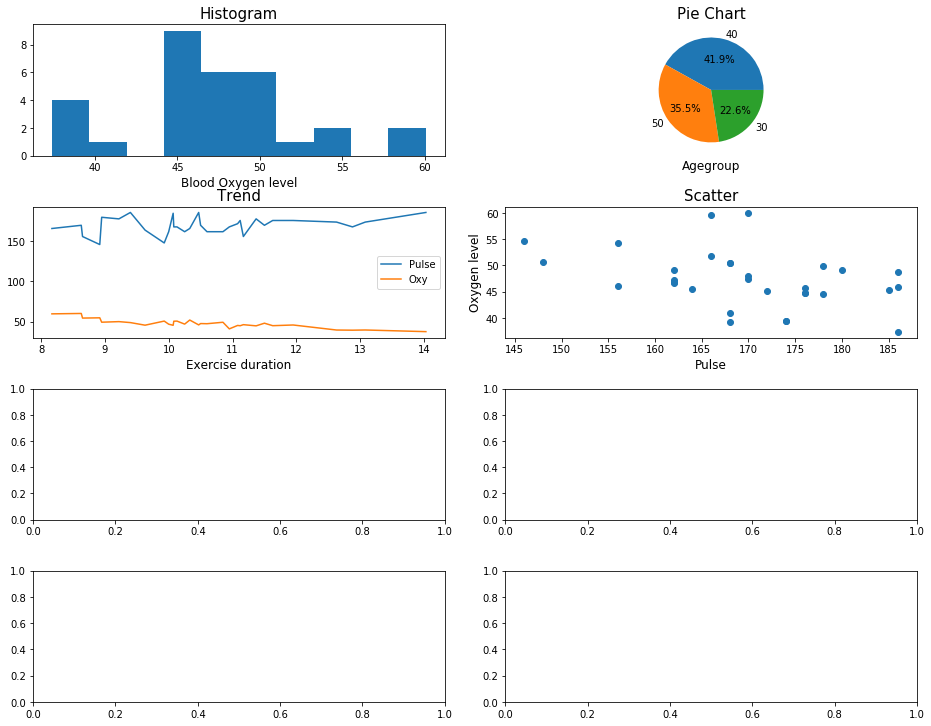

In [244]:
df_count = df_fit["AGEGROUP"].value_counts()
fig, axes = plt.subplots(nrows =4, ncols=2, figsize = (13, 10))
plt.tight_layout(w_pad=3, h_pad=3)
# pad = padding

axes[0,0].hist(df_fit["OXY"])
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("Blood Oxygen level", fontsize=12)

axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct = "%.1f%%")
axes[0,1].set_title("Pie Chart", fontsize = 15)
axes[0,1].set_xlabel("Agegroup", fontsize = 12)

axes[1,0].plot("RUNTIME","RUNPULSE", data=df_fit, label="Pulse")
# axes[1.0].plot("RUNTIME","OXY", data = df_fit, label="Blood Oxygen Level")
axes[1,0].plot("RUNTIME", "OXY", data=df_fit, label="Oxy")
axes[1,0].set_title("Trend", fontsize = 15)
axes[1,0].set_xlabel("Exercise duration", fontsize = 12)
axes[1,0].legend()

axes[1,1].scatter("RUNPULSE","OXY", data = df_fit)
axes[1,1].set_title("Scatter", fontsize = 15)
axes[1,1].set_xlabel("Pulse", fontsize = 12)
axes[1,1].set_ylabel("Oxygen level", fontsize =12)

 
# Hue : Color
# Sytle : shape of dots